# Breast Cancer Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Data Understanding

In [14]:
our_data = load_breast_cancer() #sckitlearn built-in data used for this mini proj
our_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
df = pd.DataFrame(data=our_data.data, columns=our_data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
df['target'] = our_data.target
df["target"].value_counts()

,count
target,
1,357
0,212


In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


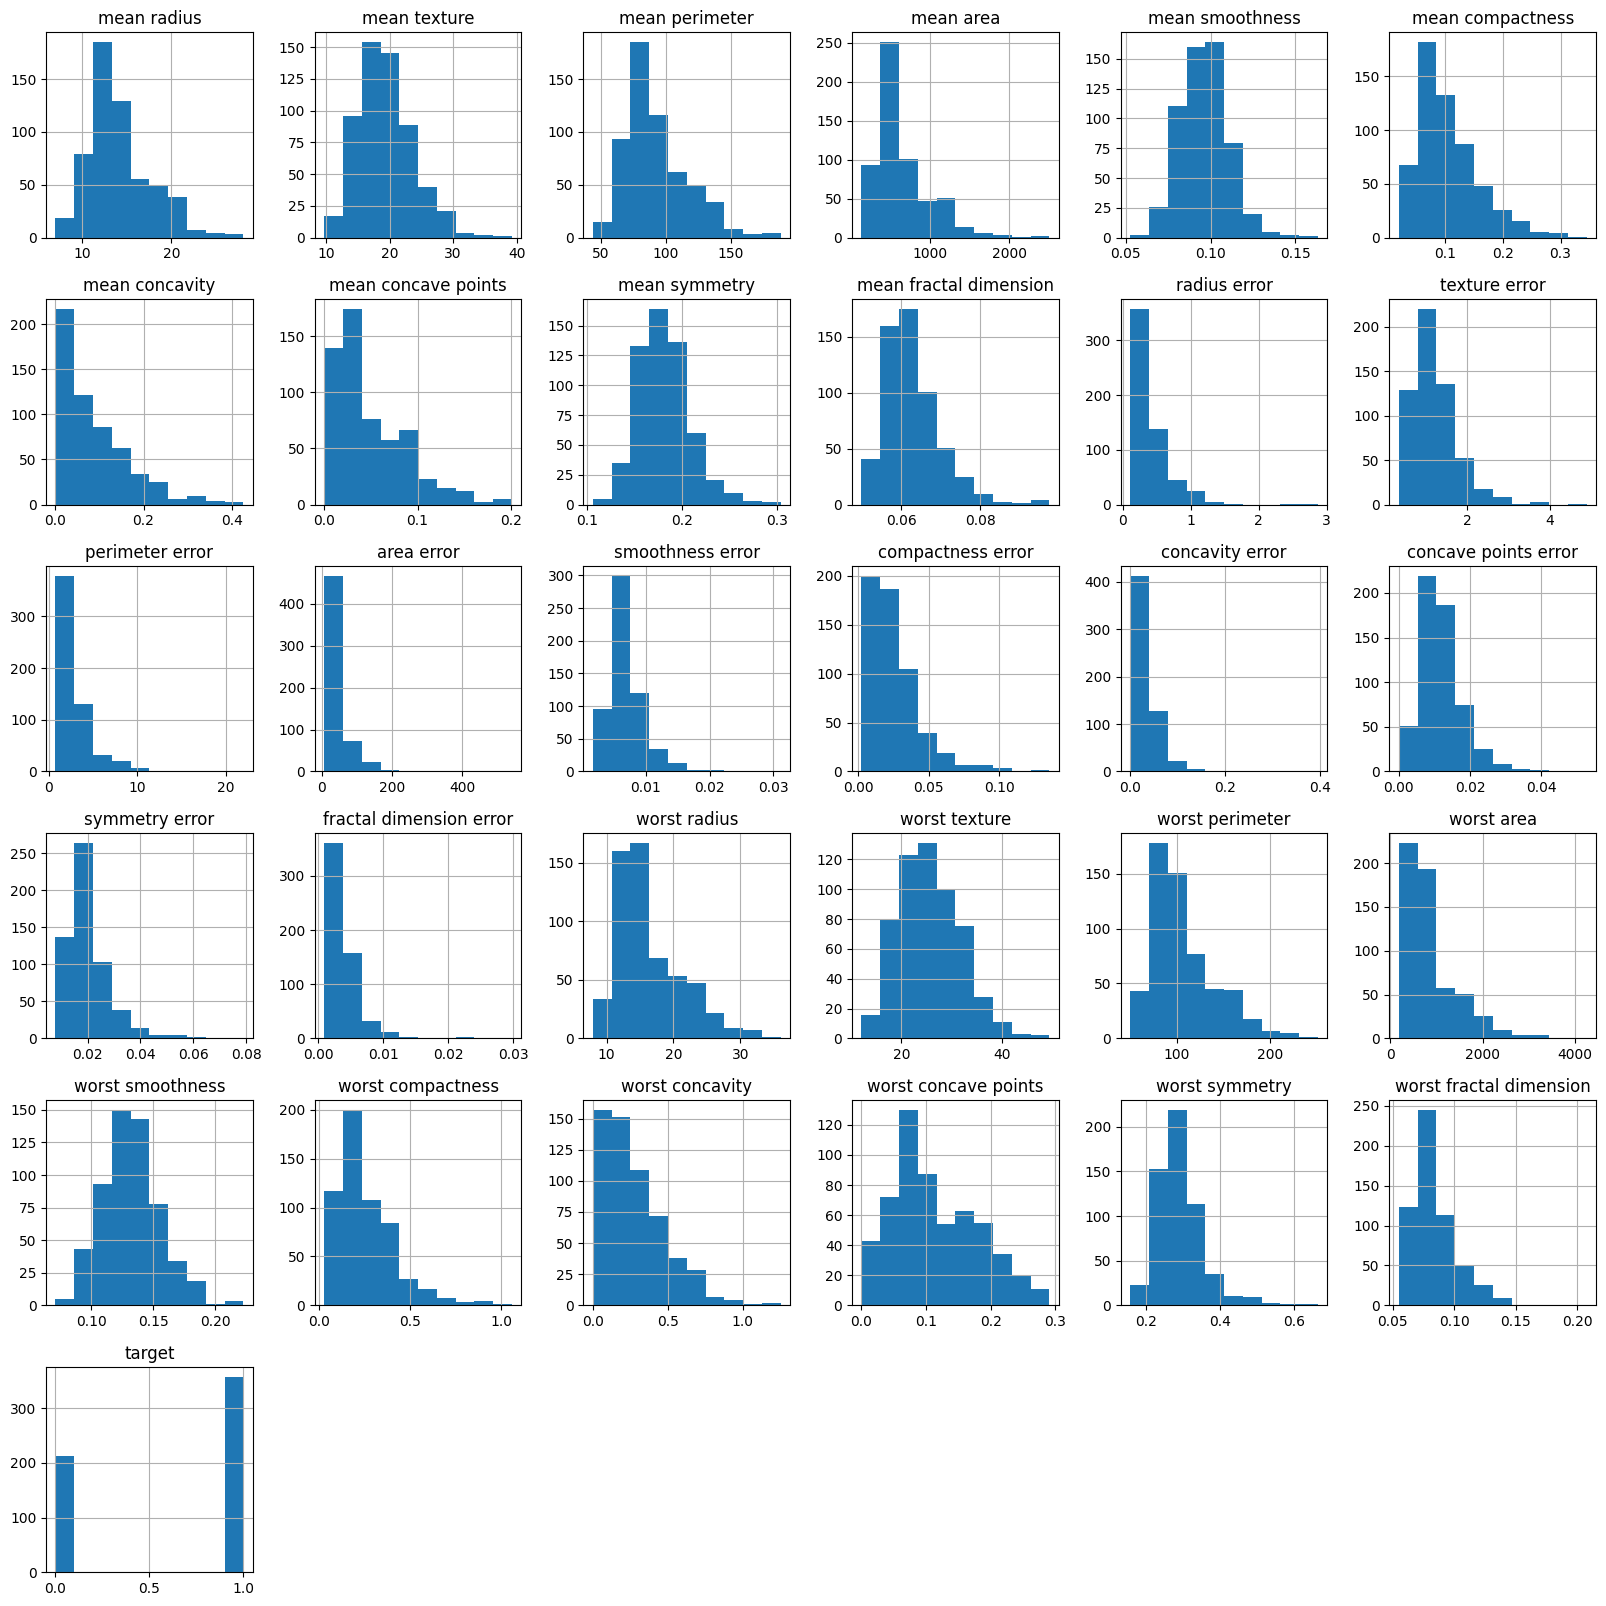

In [17]:
df.hist(figsize=(20,20))
plt.show()

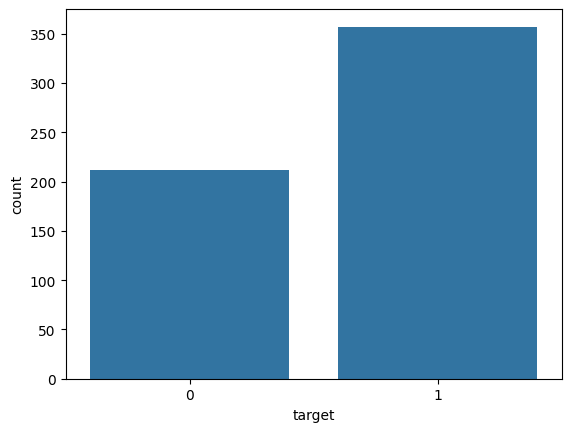

In [19]:
sns.countplot(x='target', data=df)
plt.show()

In [21]:
df.isnull().values.any()

False

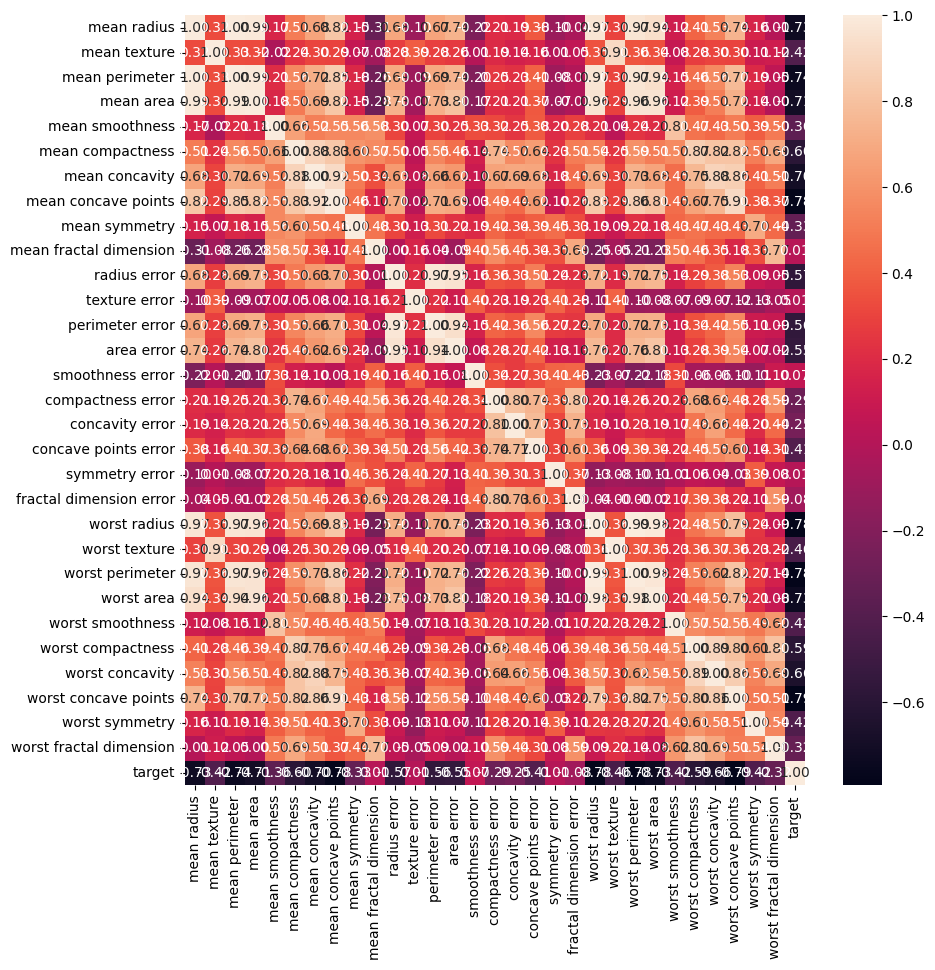

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

# Data Prep

In [23]:
data = load_breast_cancer()

X = data.data
y = data.target

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler() 
#  StandardScaler() => Converts variable value according to Standard Normal Distribution. It converts so that mean: 0 and standard deviation: 1.
# Converting Processes;
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Update weights and bias manual

## X, weights, bias and Learning Rate

In [28]:
lr = 0.01

In [29]:
X_scaled = scaler.transform(X)
X_scaled[0:1]

array([[ 1.09638851, -2.06627179,  1.27258268,  0.97763237,  1.62902429,
         3.31943081,  2.66062611,  2.59927427,  2.21441274,  2.2151773 ,
         2.45000976, -0.54954429,  2.76990654,  2.40182654, -0.19324703,
         1.25923694,  0.65107966,  0.6324067 ,  1.15846219,  0.852186  ,
         1.90281735, -1.35442338,  2.32458312,  2.0139593 ,  1.33008201,
         2.66628739,  2.09069131,  2.31736261,  2.68853795,  1.96497709]])

In [31]:
weights = np.random.normal(0, 1, 30) # weights=> It gains importance in Deep Neural Networks. I made a temporary values in here.
bias = 0.1
weights

array([-0.3450461 , -0.13507064, -0.45282647,  0.23046439,  0.04597819,
        0.55342765,  1.51842495,  0.28286554, -0.52676709, -0.68994055,
        1.41033258,  0.14470534,  0.27737673,  0.02605354, -1.57720868,
       -1.79994398, -1.10894287, -0.03911121, -2.01688502, -0.12504421,
       -1.08726075, -2.30465463,  2.06428066,  0.18775762, -0.16033707,
        0.45775205,  0.34199256,  1.08143449,  1.35439614,  0.69339107])

In [38]:
z = np.dot(X_scaled, weights) + bias # Let's find the "z" value to be used in the sigmoid function calculation.
len(z) # You should see the result to be the same as the number of observations.

569

In [39]:
z[0:5]

array([18.15882801,  7.78511607,  8.29478421,  0.04170878,  6.44699981])

## Sigmoid and y_prob

In [45]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_prob = sigmoid(z)

## Loss and Grad Desc.

In [47]:
def compute_loss(y, y_pred):
    epsilon = 1e-5 #To prevent unexpected errors in the log function, I assigned a non-significant value.
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

compute_loss(y, y_prob)

3.7448652832688354

In [50]:
def compute_gradients(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

grads_w = compute_gradients(X, y, y_prob)
grads_w[0:5]

grads_b = np.mean(y_prob - y)

In [53]:
new_weights = weights -lr * grads_w
new_weights[0:5]

array([-0.34994327, -0.1190602 , -0.49405738, -1.04388221,  0.04605507])

In [54]:
new_b = bias - lr * grads_b

# Functions

In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    epsilon = 1e-5
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

def compute_gradients(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

def gradient_descent(X, y, lr=0.01, ite_nums=100):
    weights = np.zeros(X.shape[1])
    bias = 0

    for iteration in range(ite_nums):
        z = np.dot(X, weights) + bias

        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)

        dw = compute_gradients(X, y, y_pred)

        db = np.mean(y_pred - y)

        weights -= lr * dw

        bias -= lr * db

        if (iteration + 1) % 10 == 0 or iteration == 0: # I wanted it to report every 10 iterations
            print(f'IterationSection {iteration + 1}/{ite_nums}, Loss: {loss}')

    return weights, bias

def predict(X, weights, bias):

    z = np.dot(X, weights) + bias

    y_pred = sigmoid(z)

    return y_pred >= 0.5

# Model Training

In [59]:
weights, bias = gradient_descent(X_train_scaled, y_train, lr=0.1, ite_nums=100)

IterationSection 1/100, Loss: 0.6931271807599427
IterationSection 10/100, Loss: 0.25829257199748934
IterationSection 20/100, Loss: 0.1925340902995162
IterationSection 30/100, Loss: 0.16355355112096442
IterationSection 40/100, Loss: 0.14650143681274436
IterationSection 50/100, Loss: 0.13500315830929985
IterationSection 60/100, Loss: 0.12659437303841578
IterationSection 70/100, Loss: 0.12010564582209671
IterationSection 80/100, Loss: 0.114904422705863
IterationSection 90/100, Loss: 0.11061556044528446
IterationSection 100/100, Loss: 0.1070008407100545


# Performance Evaluation

In [60]:
y_pred_valid = predict(X_val_scaled, weights, bias)

In [62]:
accuracy = accuracy_score(y_val, y_pred_valid)
print(f'Validation Accuracy: {accuracy}') # I can say that the closer the accuracy of our model is to 1, the better.

Validation Accuracy: 0.9824561403508771
